In [1]:
import sys, os
sys.path.append(os.path.abspath(os.path.join('..')))

In [2]:
import numpy as np
import scipy
from operators.legendre.legendre_operators import xi_legendre
from operators.aw_hermite.aw_hermite_operators import aw_psi_hermite

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
from mycolorpy import colorlist as mcp
import matplotlib
font = {'family' : 'serif',
        'size'   : 16}

matplotlib.rc('font', **font)
matplotlib.rc('xtick', labelsize=16) 
matplotlib.rc('ytick', labelsize=16) 

# Enable LaTeX rendering
matplotlib.rcParams['text.usetex'] = True

In [15]:
import matplotlib.cm as cm

# Get the 'inferno' colormap
inferno_cmap = cm.get_cmap('inferno')

# Sample the colormap at three different points (e.g., 25%, 50%, 75%)
color1 = inferno_cmap(0.)
color2 = inferno_cmap(0.4)
color3 = inferno_cmap(0.75)

/var/folders/tt/hgb4_vc13z77x5wpt5lzk5j40000gn/T/ipykernel_21663/3987657641.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  inferno_cmap = cm.get_cmap('inferno')


In [4]:
# hermite parameters 
alpha = 1 
u = 0 
NH = 30
# legendre parameters 
val = np.arange(2, 12, 2)
v_a = -val
v_b = val

In [5]:
J = np.zeros((len(val), NH, 3))

In [6]:
for kk in range(len(val)):
    v_ = np.linspace(v_a[kk], v_b[kk], int(1e5))
    for nn in range(NH):
        for mm in range(3):
            J[kk, nn, mm] = scipy.integrate.trapezoid(xi_legendre(n=mm, v=v_, v_a=v_a[kk], v_b=v_b[kk])
                            * aw_psi_hermite(n=nn, alpha_s=alpha, u_s=u, v=v_), x=v_, dx=np.abs(v_[1] - v_[0]))

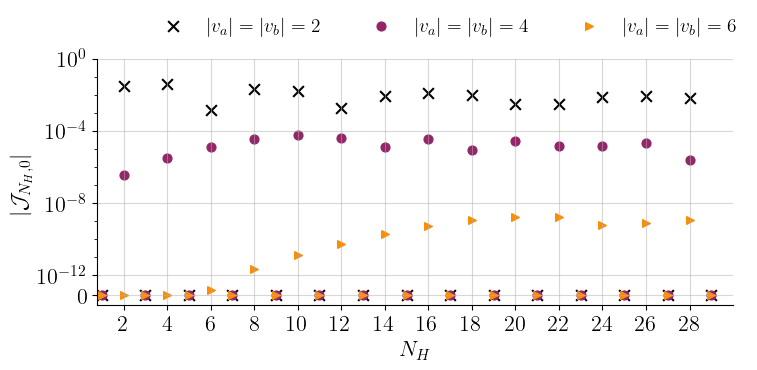

In [59]:
fig, ax = plt.subplots(figsize=(8, 4))

ax.scatter(np.arange(NH), np.abs(J[0, :, 0]), marker="x", color=color1, s=60, label="$|v_{a}| = |v_{b}| = 2$")
ax.scatter(np.arange(NH), np.abs(J[1, :, 0]), marker="o", color=color2, s=40,  label="$|v_{a}| = |v_{b}| = 4$")
ax.scatter(np.arange(NH), np.abs(J[2, :, 0]), marker=">", color=color3, s=30, label="$|v_{a}| = |v_{b}| = 6$")

ax.set_xlabel(r"$N_{H}$")
ax.set_ylabel(r"$|\mathcal{J}_{N_{H}, 0}|$")
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_yscale('symlog', linthresh=1e-12)
ax.set_xlim(0.8, 30)
ax.set_ylim(-5e-13, 1)
ax.set_xticks(np.arange(2, 30, 2))
ax.set_yticks([0, 1,  1e-4, 1e-8,  1e-12])
legend = ax.legend(ncols=3, fontsize=14, bbox_to_anchor=(0.06, 1.02))
legend.get_frame().set_alpha(0)
plt.grid(alpha=0.5)
plt.tight_layout()
plt.savefig("../figures/integrals/J_0.png", dpi=600)

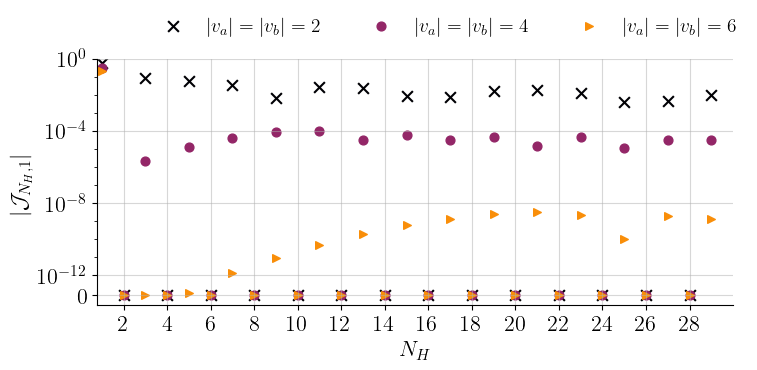

In [58]:
fig, ax = plt.subplots(figsize=(8, 4))

ax.scatter(np.arange(NH), np.abs(J[0, :, 1]), marker="x", color=color1, s=60, label="$|v_{a}| = |v_{b}| = 2$")
ax.scatter(np.arange(NH), np.abs(J[1, :, 1]), marker="o", color=color2, s=40,  label="$|v_{a}| = |v_{b}| = 4$")
ax.scatter(np.arange(NH), np.abs(J[2, :, 1]), marker=">", color=color3, s=30, label="$|v_{a}| = |v_{b}| = 6$")

ax.set_xlabel(r"$N_{H}$")
ax.set_ylabel(r"$|\mathcal{J}_{N_{H}, 1}|$")
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_yscale('symlog', linthresh=1e-12)
ax.set_xlim(0.8, 30)
ax.set_ylim(-5e-13, 1)
ax.set_xticks(np.arange(2, 30, 2))
ax.set_yticks([0, 1,  1e-4, 1e-8,  1e-12])
legend = ax.legend(ncols=3, fontsize=14, bbox_to_anchor=(0.06, 1.02))
legend.get_frame().set_alpha(0)
plt.grid(alpha=0.5)
plt.tight_layout()
plt.savefig("../figures/integrals/J_1.png", dpi=600)

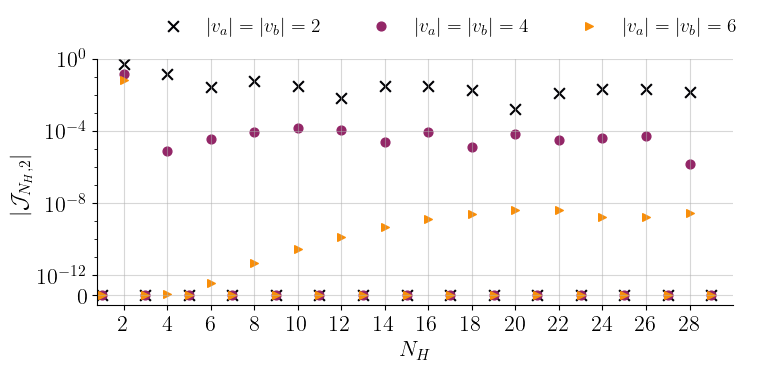

In [57]:
fig, ax = plt.subplots(figsize=(8, 4))

ax.scatter(np.arange(NH), np.abs(J[0, :, 2]), marker="x", color=color1, s=60, label="$|v_{a}| = |v_{b}| = 2$")
ax.scatter(np.arange(NH), np.abs(J[1, :, 2]), marker="o", color=color2, s=40,  label="$|v_{a}| = |v_{b}| = 4$")
ax.scatter(np.arange(NH), np.abs(J[2, :, 2]), marker=">", color=color3, s=30, label="$|v_{a}| = |v_{b}| = 6$")

ax.set_xlabel(r"$N_{H}$")
ax.set_ylabel(r"$|\mathcal{J}_{N_{H}, 2}|$")
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_yscale('symlog', linthresh=1e-12)
ax.set_xlim(0.8, 30)
ax.set_ylim(-5e-13, 1)
ax.set_xticks(np.arange(2, 30, 2))
ax.set_yticks([0, 1,  1e-4, 1e-8,  1e-12])
legend = ax.legend(ncols=3, fontsize=14, bbox_to_anchor=(0.06, 1.02))
legend.get_frame().set_alpha(0)
plt.grid(alpha=0.5)
plt.tight_layout()
plt.savefig("../figures/integrals/J_2.png", dpi=600)